# Retinal Degeneration Associated With RPGRIP1


Data from [Beryozkin A, et al. Retinal Degeneration Associated With RPGRIP1: A Review of Natural History, Mutation Spectrum, and Genotype-Phenotype Correlation in 228 Patients](https://pubmed.ncbi.nlm.nih.gov/34722527)

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.2.1.dev0


### Load Phenopackets

We will load phenopackets from the *RPGRIP1* cohort of Phenopacket Store `0.1.19`.

In [2]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'RPGRIP1'
phenopacket_store_release = '0.1.19'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()

Patients Created: 100%|██████████| 229/229 [04:42<00:00,  1.23s/it]
Validated under none policy
No errors or warnings were found


### Pick transcript

We choose the [MANE Select](https://www.ncbi.nlm.nih.gov/nuccore/NM_020366.4) transcript for *RPGRIP1*.

In [4]:
RPGRIP1_MANE_transcript = 'NM_020366.4'
RPGRIP1_protein_id = 'NP_065099.3'

## Explore cohort

Explore the cohort to guide selection of the genotype-phenotype analysis.


In [5]:
from IPython.display import display, HTML
from gpsea.view import CohortViewable

cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=RPGRIP1_MANE_transcript)

display(HTML(html))

HPO Term,ID,Seen in n individuals
Very low visual acuity,HP:0032122,89
Abnormal electroretinogram,HP:0000512,28
Eye poking,HP:0001483,28
Moderately reduced visual acuity,HP:0030515,24
Moderate hypermetropia,HP:0031729,12
Global developmental delay,HP:0001263,12
Constriction of peripheral visual field,HP:0001133,10
High hypermetropia,HP:0008499,9
Severely reduced visual acuity,HP:0001141,6
High myopia,HP:0011003,4


<Axes: title={'center': 'X-linked retinitis pigmentosa GTPase regulator-interacting protein 1\ntranscript: NM_020366.4, protein: NP_065099.3'}>

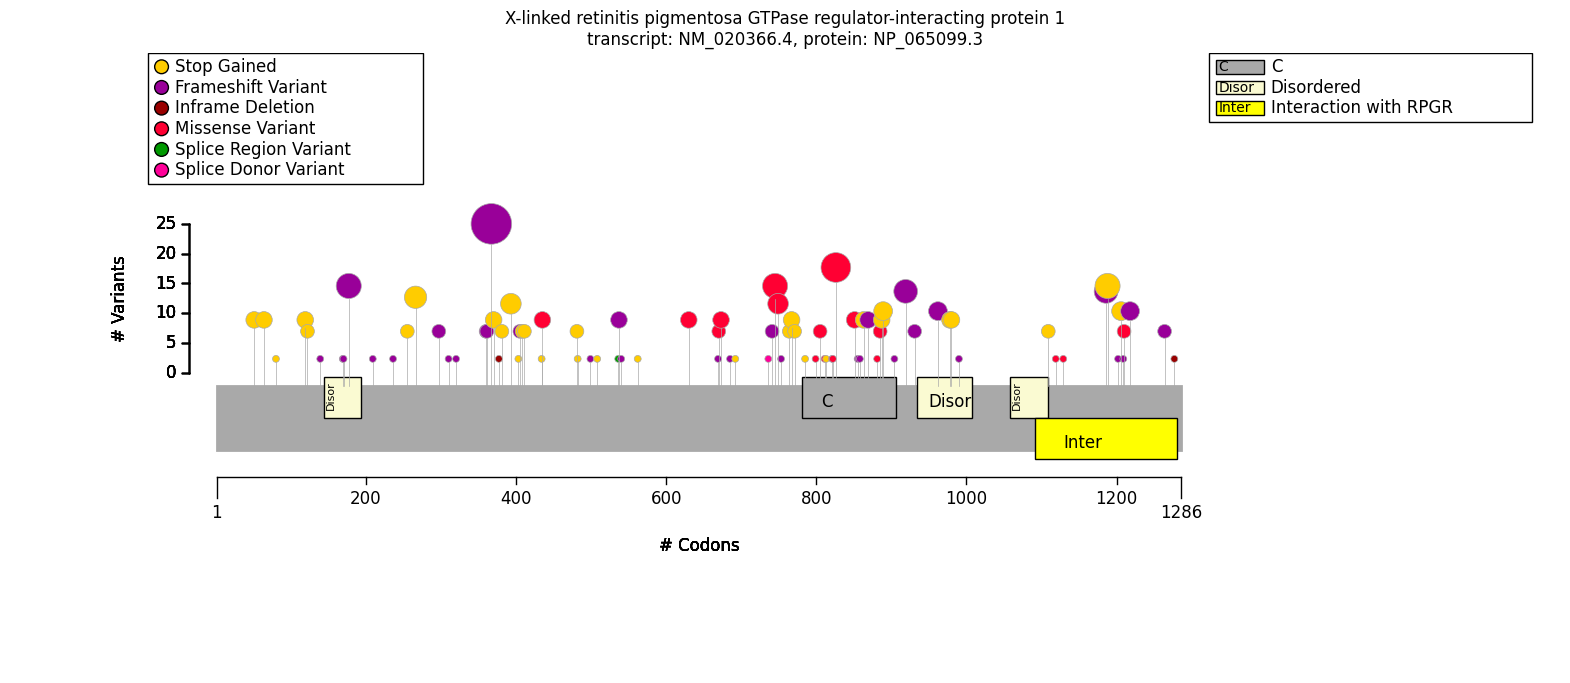

In [6]:
from gpsea.preprocessing import configure_protein_metadata_service
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(RPGRIP1_MANE_transcript)

pms = configure_protein_metadata_service()
protein_meta = pms.annotate(RPGRIP1_protein_id)

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [7]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,144 - 193,10
C2,domain,781 - 906,42
Disordered,region,934 - 1008,11
Disordered,region,1058 - 1108,0
Interaction with RPGR,region,1091 - 1281,34


## Configure the analysis

In [8]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import PatientCategories
from gpsea.analysis.predicate.genotype import VariantPredicates

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False

all_hpo_analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

## Run the analyses

Test for presence of genotype-phenotype correlations between missense variants vs. others.

In [9]:
is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, RPGRIP1_MANE_transcript)
by_missense = all_hpo_analysis.compare_hpo_vs_genotype(is_missense)
by_missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_020366.4                       Yes  ...                  
                                                    Count  ... Corrected p value
Global developmental delay [HP:0001263]              0/50  ...               1.0
Eye poking [HP:0001483]                               3/5  ...               1.0
Restricted or repetitive behaviors or interests...    3/3  ...               1.0
Recurrent maladaptive behavior [HP:5200241]           3/3  ...               1.0
Abnormality of the eye [HP:0000478]                 24/24  ...               1.0
Myopia [HP:0000545]                                   0/0  ...               1.0
Abnormality of mental function [HP:0011446]           3/3  ...               1.0
Tactile sensory seeking [HP:5200065]                  3/3  ...               1.0
Abnormal movements of face and head [HP:5200017]      3/3  ...               1.0
Mild hypermetropia [HP:0031728]                       1/1  ...               1.0
Abnormal nervous system physiology [HP:0012638]       3/3  ...               1.0
Severely reduced visual acuity [HP:0001141]           0/0  ...               1.0
Sensory behavioral abnormality [HP:5200046]           3/3  ...               1.0
Constriction of peripheral visual field [HP:000...    1/1  ...               1.0
Abnormality of refraction [HP:0000539]                4/4  ...               1.0
Hypermetropia [HP:0000540]                            4/4  ...               1.0
Abnormal electroretinogram [HP:0000512]               4/4  ...               1.0
Abnormal eye physiology [HP:0012373]                24/24  ...               1.0
Abnormal repetitive mannerisms [HP:0000733]           3/3  ...               1.0
Very low visual acuity [HP:0032122]                 15/15  ...               1.0
High myopia [HP:0011003]                              0/0  ...               1.0
All [HP:0000001]                                    24/24  ...               1.0
Abnormality of the nervous system [HP:0000707]        3/3  ...               1.0
Visual impairment [HP:0000505]                      24/24  ...               1.0
High hypermetropia [HP:0008499]                       0/0  ...               1.0
Moderately reduced visual acuity [HP:0030515]         9/9  ...               1.0
Mildly reduced visual acuity [HP:0032037]             0/0  ...               1.0
Visual field defect [HP:0001123]                      1/1  ...               1.0
Reduced visual acuity [HP:0007663]                  24/24  ...               1.0
Sensory seeking [HP:4000079]                          3/3  ...               1.0
Neurodevelopmental delay [HP:0012758]                 0/0  ...               1.0
Self-injurious behavior [HP:0100716]                  3/3  ...               1.0
Phenotypic abnormality [HP:0000118]                 24/24  ...               1.0
Neurodevelopmental abnormality [HP:0012759]           0/0  ...               1.0
Moderate hypermetropia [HP:0031729]                   3/3  ...               1.0
Atypical behavior [HP:0000708]                        3/3  ...               1.0
Abnormal visual electrophysiology [HP:0030453]        4/4  ...               1.0
Abnormality of vision [HP:0000504]                  24/24  ...               1.0

[38 rows x 6 columns]

Test for presence of genotype-phenotype correlations between frameshift variants vs. others.

In [11]:
is_frameshift = VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=RPGRIP1_MANE_transcript)
by_frameshift = all_hpo_analysis.compare_hpo_vs_genotype(is_frameshift)
by_frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_020366.4                     Yes  ...                  
                                                    Count  ... Corrected p value
Eye poking [HP:0001483]                             23/27  ...          0.645352
Global developmental delay [HP:0001263]              8/91  ...          1.000000
Restricted or repetitive behaviors or interests...  23/23  ...          1.000000
Recurrent maladaptive behavior [HP:5200241]         23/23  ...          1.000000
Abnormality of the eye [HP:0000478]                 52/52  ...          1.000000
Myopia [HP:0000545]                                   4/4  ...          1.000000
Abnormality of mental function [HP:0011446]         23/23  ...          1.000000
Tactile sensory seeking [HP:5200065]                23/23  ...          1.000000
Abnormal movements of face and head [HP:5200017]    23/23  ...          1.000000
Mild hypermetropia [HP:0031728]                       1/1  ...          1.000000
Abnormal nervous system physiology [HP:0012638]     27/27  ...          1.000000
Severely reduced visual acuity [HP:0001141]           3/3  ...          1.000000
Sensory behavioral abnormality [HP:5200046]         23/23  ...          1.000000
Constriction of peripheral visual field [HP:000...    5/5  ...          1.000000
Abnormality of refraction [HP:0000539]              16/16  ...          1.000000
Hypermetropia [HP:0000540]                          12/12  ...          1.000000
Abnormal electroretinogram [HP:0000512]             11/11  ...          1.000000
Abnormal eye physiology [HP:0012373]                52/52  ...          1.000000
Abnormal repetitive mannerisms [HP:0000733]         23/23  ...          1.000000
Very low visual acuity [HP:0032122]                 36/36  ...          1.000000
High myopia [HP:0011003]                              4/4  ...          1.000000
All [HP:0000001]                                    52/52  ...          1.000000
Abnormality of the nervous system [HP:0000707]      27/27  ...          1.000000
Visual impairment [HP:0000505]                      48/48  ...          1.000000
High hypermetropia [HP:0008499]                       4/4  ...          1.000000
Moderately reduced visual acuity [HP:0030515]         8/8  ...          1.000000
Mildly reduced visual acuity [HP:0032037]             1/1  ...          1.000000
Visual field defect [HP:0001123]                      5/5  ...          1.000000
Reduced visual acuity [HP:0007663]                  48/48  ...          1.000000
Sensory seeking [HP:4000079]                        23/23  ...          1.000000
Neurodevelopmental delay [HP:0012758]                 8/8  ...          1.000000
Self-injurious behavior [HP:0100716]                23/23  ...          1.000000
Phenotypic abnormality [HP:0000118]                 52/52  ...          1.000000
Neurodevelopmental abnormality [HP:0012759]           8/8  ...          1.000000
Moderate hypermetropia [HP:0031729]                   7/7  ...          1.000000
Atypical behavior [HP:0000708]                      23/23  ...          1.000000
Abnormal visual electrophysiology [HP:0030453]      11/11  ...          1.000000
Abnormality of vision [HP:0000504]                  48/48  ...          1.000000

[38 rows x 6 columns]

Or between subjects with >=1 allele of a variant vs. the other subjects:

In [12]:
variant_key = '14_21312457_21312458_GA_G'
is_variant = VariantPredicates.variant_key(variant_key)

by_var = all_hpo_analysis.compare_hpo_vs_genotype(is_variant)
by_var.summarize(hpo, PatientCategories.YES)

variant has ID of 14_21312457_21312458_GA_G           Yes  ...                  
                                                    Count  ... Corrected p value
Eye poking [HP:0001483]                             16/16  ...          0.034930
Global developmental delay [HP:0001263]              4/25  ...          0.947524
Restricted or repetitive behaviors or interests...  16/16  ...          1.000000
Recurrent maladaptive behavior [HP:5200241]         16/16  ...          1.000000
Abnormality of the eye [HP:0000478]                 17/17  ...          1.000000
Myopia [HP:0000545]                                   0/0  ...          1.000000
Abnormality of mental function [HP:0011446]         16/16  ...          1.000000
Tactile sensory seeking [HP:5200065]                16/16  ...          1.000000
Abnormal movements of face and head [HP:5200017]    16/16  ...          1.000000
Mild hypermetropia [HP:0031728]                       0/0  ...          1.000000
Abnormal nervous system physiology [HP:0012638]     16/16  ...          1.000000
Severely reduced visual acuity [HP:0001141]           0/0  ...          1.000000
Sensory behavioral abnormality [HP:5200046]         16/16  ...          1.000000
Constriction of peripheral visual field [HP:000...    0/0  ...          1.000000
Abnormality of refraction [HP:0000539]                3/3  ...          1.000000
Hypermetropia [HP:0000540]                            3/3  ...          1.000000
Abnormal electroretinogram [HP:0000512]               0/0  ...          1.000000
Abnormal eye physiology [HP:0012373]                17/17  ...          1.000000
Abnormal repetitive mannerisms [HP:0000733]         16/16  ...          1.000000
Very low visual acuity [HP:0032122]                 17/17  ...          1.000000
High myopia [HP:0011003]                              0/0  ...          1.000000
All [HP:0000001]                                    17/17  ...          1.000000
Abnormality of the nervous system [HP:0000707]      16/16  ...          1.000000
Visual impairment [HP:0000505]                      17/17  ...          1.000000
High hypermetropia [HP:0008499]                       3/3  ...          1.000000
Moderately reduced visual acuity [HP:0030515]         0/0  ...          1.000000
Mildly reduced visual acuity [HP:0032037]             0/0  ...          1.000000
Visual field defect [HP:0001123]                      0/0  ...          1.000000
Reduced visual acuity [HP:0007663]                  17/17  ...          1.000000
Sensory seeking [HP:4000079]                        16/16  ...          1.000000
Neurodevelopmental delay [HP:0012758]                 4/4  ...          1.000000
Self-injurious behavior [HP:0100716]                16/16  ...          1.000000
Phenotypic abnormality [HP:0000118]                 17/17  ...          1.000000
Neurodevelopmental abnormality [HP:0012759]           4/4  ...          1.000000
Moderate hypermetropia [HP:0031729]                   0/0  ...          1.000000
Atypical behavior [HP:0000708]                      16/16  ...          1.000000
Abnormal visual electrophysiology [HP:0030453]        0/0  ...          1.000000
Abnormality of vision [HP:0000504]                  17/17  ...          1.000000

[38 rows x 6 columns]

In [13]:
is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, RPGRIP1_MANE_transcript)
by_dis = all_hpo_analysis.compare_disease_vs_genotype(is_missense)
by_dis.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_020366.4    Yes          ...                            
                                 Count Percent  ...   p value Corrected p value
OMIM:613826                      30/50     60%  ...  0.000004          0.000008
OMIM:608194                      20/50     40%  ...  0.000004          0.000008

[2 rows x 6 columns]

In [14]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.hpo_mtc_strategy()
hpo_analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)


In [15]:
by_frameshift = hpo_analysis.compare_hpo_vs_genotype(is_frameshift)
by_frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_020366.4          Yes  ...                  
                                         Count  ... Corrected p value
Eye poking [HP:0001483]                  23/27  ...          0.033966
Abnormal electroretinogram [HP:0000512]  11/11  ...          1.000000

[2 rows x 6 columns]

In [16]:
by_var = all_hpo_analysis.compare_hpo_vs_recessive_genotype(is_variant)
by_var.summarize(hpo, PatientCategories.YES)

variant has ID of 14_21312457_21312458_GA_G          Both  ...                  
                                                    Count  ... Corrected p value
Eye poking [HP:0001483]                             16/16  ...          0.034930
Global developmental delay [HP:0001263]              4/25  ...          0.947524
Restricted or repetitive behaviors or interests...  16/16  ...          1.000000
Recurrent maladaptive behavior [HP:5200241]         16/16  ...          1.000000
Abnormality of the eye [HP:0000478]                 17/17  ...          1.000000
Myopia [HP:0000545]                                   0/0  ...          1.000000
Abnormality of mental function [HP:0011446]         16/16  ...          1.000000
Tactile sensory seeking [HP:5200065]                16/16  ...          1.000000
Abnormal movements of face and head [HP:5200017]    16/16  ...          1.000000
Mild hypermetropia [HP:0031728]                       0/0  ...          1.000000
Abnormal nervous system physiology [HP:0012638]     16/16  ...          1.000000
Severely reduced visual acuity [HP:0001141]           0/0  ...          1.000000
Sensory behavioral abnormality [HP:5200046]         16/16  ...          1.000000
Constriction of peripheral visual field [HP:000...    0/0  ...          1.000000
Abnormality of refraction [HP:0000539]                3/3  ...          1.000000
Hypermetropia [HP:0000540]                            3/3  ...          1.000000
Abnormal electroretinogram [HP:0000512]               0/0  ...          1.000000
Abnormal eye physiology [HP:0012373]                17/17  ...          1.000000
Abnormal repetitive mannerisms [HP:0000733]         16/16  ...          1.000000
Very low visual acuity [HP:0032122]                 17/17  ...          1.000000
High myopia [HP:0011003]                              0/0  ...          1.000000
All [HP:0000001]                                    17/17  ...          1.000000
Abnormality of the nervous system [HP:0000707]      16/16  ...          1.000000
Visual impairment [HP:0000505]                      17/17  ...          1.000000
High hypermetropia [HP:0008499]                       3/3  ...          1.000000
Moderately reduced visual acuity [HP:0030515]         0/0  ...          1.000000
Mildly reduced visual acuity [HP:0032037]             0/0  ...          1.000000
Visual field defect [HP:0001123]                      0/0  ...          1.000000
Reduced visual acuity [HP:0007663]                  17/17  ...          1.000000
Sensory seeking [HP:4000079]                        16/16  ...          1.000000
Neurodevelopmental delay [HP:0012758]                 4/4  ...          1.000000
Self-injurious behavior [HP:0100716]                16/16  ...          1.000000
Phenotypic abnormality [HP:0000118]                 17/17  ...          1.000000
Neurodevelopmental abnormality [HP:0012759]           4/4  ...          1.000000
Moderate hypermetropia [HP:0031729]                   0/0  ...          1.000000
Atypical behavior [HP:0000708]                      16/16  ...          1.000000
Abnormal visual electrophysiology [HP:0030453]        0/0  ...          1.000000
Abnormality of vision [HP:0000504]                  17/17  ...          1.000000

[38 rows x 8 columns]

*-* EOF *-*